## Problema 1:

Vamos (finalmente) plotar a pluma do nosso vazamento de amônia.

Nós tínhamos calculado o quanto que vazou, depois calculamos a taxa de evaporação. Agora, vamos plotar o gráfico de pluma, que nada mais é do que a superfície de contorno gerada por vários pontos $X, Y$ num diagrama cartesiano.

Quando nós fazemos esse tipo de gráfico, é bem interessante que usemos classificações específicas das áreas do gráfico, que nos informem quais regiões representam qual perigo. Assim, podemos ter pegar rapidamente a noção da gravidade do problema.

Os AEGL [(Acute Exposure Guideline Levels ou Níveis de Indicação de Exposição Aguda)](https://en.wikipedia.org/wiki/Acute_Exposure_Guideline_Levels) nos dão valores os quais, num certo tempo de exposição, concentrações acima dele gerarão certos efeitos nas pessoas expostas.

Acima do valor de AEGL-1: desconforto e irritação poderá ser sentida enquanto a exposição durar.  
Acima do valor de AEGL-2: danos permanentes ou de longa duração ou inabilidade de escapar do ambiente (desmaio ou perda de visão temporária) poderá ser sentido.  
Acima do valor de AEGL-3: efeitos que comprometam a vida ou fatalidades podem acontecer.  

Para a amônia, estes são os valores de AEGL, para 1 hora de exposição:

|      |Concentração (ppm)    |
|:----:|:--------------------:|
|AEGL-1| 30                   |
|AEGL-2| 160                  |
|AEGL-3| 1100                 |

Sua missão, agora, é gerar vários pontos, usando as funções que você construiu na semana 3, de operadores lógicos e condicionais. Como você bem deve lembrar, a concentração cai bruscamente com a distância da poça. Por conta disso, para criar um gráfico fidedigno, a sua lista de pontos não deve ser linear, mas deve conter mais pontos próximos da origem do gráfico. A lista de pontos para se obter os valores de concentração deve estar em escala *logarítmica* (preferencialmente de base 10). Isto quer dizer que os pontos próximos da origem deverão ter um espaçamento menor, como de 1 em 1m, e mais pro final, digamos X = 5Km e Y = 5Km, de 100 em 100m. Considere incluir espaçamentos diferentes na direção X e Y, visto que as concentrações decaem muito mais rapidamente em Y.

Dicas e Notas:

- Já vou deixar pra você aqui as coisas da semana 3 que você vai precisar.
- Opte por usar a compreensão de listas para fazer as listas de pontos.
- Não se preocupe com a confecção dos gráficos, mas gere resultados num formato que seja aceito, conforme segue:
    - Crie três listas, de nomes:
        - x1s: conterá os pontos X (sempre positivos)
        - y1s: conterá os pontos Y > 0;
        - y2s: conterá os pontos Y < 0;
    - Use exatamente estes nomes para as listas.
    
    
- Visualize o efeito do desastre no Google Maps:
    - Coloque X e Y variando entre o mesmo valor (ex: 0 e 10000m)
    - Printe e salve a imagem.
    - Abra o Google Maps e pegue o local de uma planta de fertilizantes nitrogenados (sugestão: FAFEN-SE).
        - Printe o local, com a escala vísivel.
    - Abra algum editor imagem (o [Canva](https://www.canva.com/) serve perfeitamente).
    - Diminua a opacidade da pluma (pode ser interessante [remover o fundo dela](https://www.remove.bg/pt-br/upload)).
    - Sobreponha a pluma na imagem do Google Maps.
    - Contemple o desaste. Ele é grave? Qual o potencial desse acidente? Provavelmente haveria mortos? Qual seria a repercussão do acidente? Qual seria o dano à empresa?
    
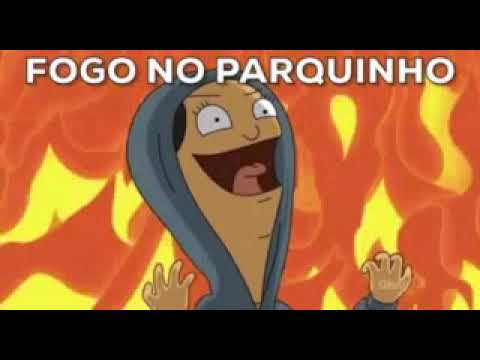

In [6]:
import math as m
pi = m.pi 
e = m.e
ln = lambda x: m.log(x, e)
log10 = lambda x: m.log(x, 10)

def conversor_temperatura(t, escala_i, escala_f):
    
    if escala_i == escala_f:
        return t
    
    else:
        if escala_i == 'celsius':
            if escala_f == 'kelvin':
                return t + 273.15
            elif escala_f == 'fahrenheit':
                return t * 9/5 + 32
            else:
                return t * 9/5 + 491.67
            
        elif escala_i == 'kelvin':
            if escala_f == 'celsius':
                return t - 273.15
            elif escala_f == 'fahrenheit':
                return (t - 273.15) * 9/5 + 32
            else:
                return t * 9/5
            
        elif escala_i == 'fahrenheit':
            if escala_f == 'celsius':
                return (t - 32) * 5/9
            elif escala_f == 'kelvin':
                return (t - 32) * 5/9 + 273.15
            else:
                return t + 459.67
        
        else:
            if escala_f == 'celsius':
                return t * 5/9 - 273.15
            elif escala_f == 'kelvin':
                return t * 5/9
            else:
                return t - 459.67

def classeEstabilidade():
    """ 
    assegurar que se caso dia ou noite seja escolhido, informação correta sobre o tempo é inputada.
    evitando algo como "noite com insolação forte" ou 
    "dia parcialmente nublado (que embora possível, deve ser colocado em termos de insolação)". 
    """
    assert horario >= 0 and horario <= 24
    assert (
        horario >= 7 and horario <= 17 and 
        (condTempo == 'forte' or condTempo == 'medio' or condTempo == 'fraco' or condTempo == 'completamente nublado') or 
        
        (horario >= 0 and horario <= 6 or horario >= 18 and horario <= 24) and
        (condTempo == 'parcialmente nublado' or condTempo == 'claro' or condTempo == 'completamente nublado')
    )
    #-------------------------------------------------------------------------------------------------------------
    
    if (horario >= 6 and horario <= 7 or horario >= 17 and horario <= 18) or condTempo == 'completamente nublado':
        return 'D'
    
    elif horario >= 7 and horario <= 17:
        if condTempo == 'forte':
            if u <= 3:
                return 'A'
            elif u <= 4:
                return 'B'
            else:
                return 'C'                
            
        elif condTempo == 'medio':
            if u <= 2:
                return 'A'
            elif u <= 3:
                return 'B'
            elif u <= 6:
                return 'C'
            else:
                return 'D'
            
        else:
            if u <= 2:
                return 'B'
            elif u <= 4:
                return 'C'
            else:
                return 'D'
            
    else:
        if condTempo == 'parcialmente nublado':
            if u <= 2:
                return 'F'
            elif u <= 3:
                return 'E'
            else:
                return 'D'
        else:
            if u <= 3:
                return 'F'
            elif u <= 4:
                return 'E'
            else:
                return 'D' 

def sigma(x):
    assert type(isRural) == bool # isRural deve ser um input de True ou False.
    classe_estabilidade = classeEstabilidade().capitalize() 
    """
    um truquezinho p/ garantir que tanto letras maiúsculas e minúsculas serão reconhecidas.
    Ele passa tudo para maiúsculo.
    """   
    if isRural:
        if classe_estabilidade == 'A':
            sigmay = 0.22*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.2*x
        elif classe_estabilidade == 'B':
            sigmay = 0.16*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.12*x
        elif classe_estabilidade == 'C':
            sigmay = 0.11*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.08*x*(1 + 0.0002*x)**(-1/2)
        elif classe_estabilidade == 'D':
            sigmay = 0.08*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.06*x*(1 + 0.00015*x)**(-1/2)
        elif classe_estabilidade == 'E':
            sigmay = 0.06*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.03*x*(1 + 0.0003*x)**-1
        else:
            sigmay = 0.04*x*(1 + 0.0001*x)**(-1/2)
            sigmaz = 0.016*x*(1 + 0.0003*x)**-1
            
    else:
        if classe_estabilidade == 'A' or classe_estabilidade == 'B':
            sigmay = 0.32*x*(1 + 0.0004*x)**(-1/2)
            sigmaz = 0.24*x*(1 + 0.0001*x)**(1/2)
        elif classe_estabilidade == 'C':
            sigmay = 0.22*x*(1 + 0.0004*x)**(-1/2)
            sigmaz = 0.2*x
        elif classe_estabilidade == 'D':
            sigmay = 0.16*x*(1 + 0.0004*x)**(-1/2)
            sigmaz = 0.14*x*(1 + 0.0003*x)**(-1/2)
        else:
            sigmay = 0.11*x*(1 + 0.0004*x)**(-1/2)
            sigmaz = 0.08*x*(1 + 0.0015*x)**(-1/2)
            
    return sigmay, sigmaz    

def concentracao(x, y):
    """
    experimente o modelo para valores muito pequenos de x e veja que ele perde completamente o significado físico.
    """
    k = K()    
    psat = Psat()
    q = Q()
    classe_estabilidade = classeEstabilidade()
    sigmay, sigmaz = sigma(x)
    
    conc = q/pi/u/sigmay/sigmaz * e**(-1/2 * y**2/sigmay**2) *1e6
    return conc  

In [2]:
#------------Dados Metereológicos da Fafen-SE.------------------
T = 24 #ºC
T = conversor_temperatura(T, 'celsius', 'kelvin') #A variável T está sendo sobreescrita, usando a T velha como argumento.
u = 0.8 #m/s ---> velocidade do vento
isRural = False
horario = 7
condTempo = 'completamente nublado'

#------------Dados para os modelos------------------

A = 1000 #m²
R = 8.314 #J/K/mol

K0 = 0.83 #cm/s
M0 = 18 #g/mol
M = 17 #g/mol

c1= 90 
c2= -4669.7 
c3= -11.607 
c4= 1.72e-2 
c5= 1 

#----------------Conversões SI----------------------
K0 = K0/100 #m/s
M0 = M0/1000 #kg/mol
M = M/1000 #kg/mol

#--------------------Funções-------------------------
K = lambda: K0 * (M0/M)**(1/3)
Psat = lambda: e**(c1 + c2/T + c3*ln(T) + c4*T**c5)
Q = lambda: M*K()*A*Psat()/R/T

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


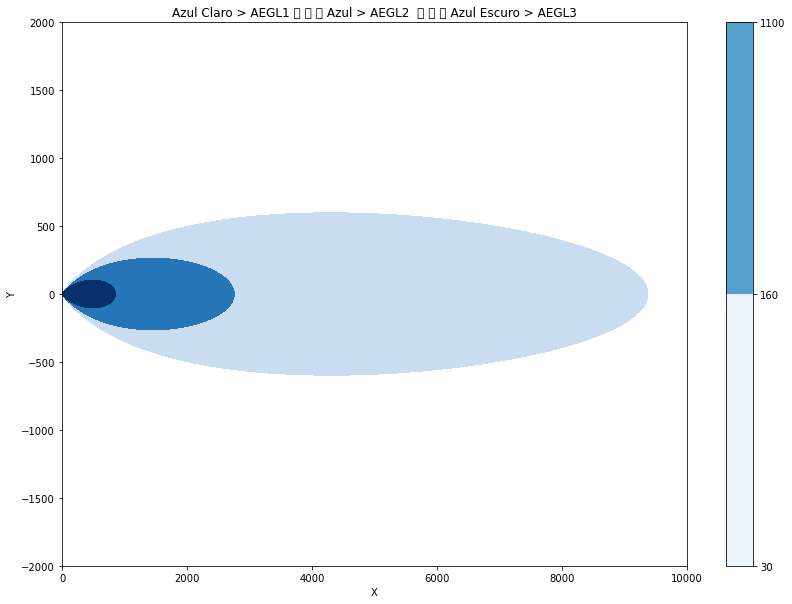

In [4]:
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook

aegl1 = 30 #mg/m³
aegl2 = 160 #mg/m³
aegl3 = 1100 #mg/m³

X1s, Y1s = np.meshgrid(x1s, y1s)
X2s, Y2s = np.meshgrid(x1s, y2s)
Concentracoes1 = concentracao(X1s, Y1s)
Concentracoes2 = concentracao(X2s, Y2s)
Concentracoes1 = ma.masked_where(Concentracoes1 < 10, Concentracoes1)
Concentracoes2 = ma.masked_where(Concentracoes2 < 10, Concentracoes2)
gambiarra1, gambiarra2 = np.meshgrid(np.array([0, 1]), np.array([0, 1]))


fundo = plt.figure(figsize = (14, 10))
contorno = fundo.add_subplot(1, 1, 1)

gambiarra = contorno.contourf(gambiarra1, gambiarra2, gambiarra2, cmap = cm.Blues, 
                              levels = [aegl1, aegl2, aegl3])
metadeSuperior = contorno.contourf(X1s, Y1s, Concentracoes1, cmap = cm.Blues,
                                   norm=colors.LogNorm(vmin=aegl1, vmax=aegl3), levels = [aegl1, aegl2, aegl3, 1e6])
metadeInferior = contorno.contourf(X2s, Y2s, Concentracoes2, cmap = cm.Blues, 
                                   norm=colors.LogNorm(vmin=aegl1, vmax=aegl3), levels = [aegl1, aegl2, aegl3, 1e6])
contorno.set_ylabel('Y')
contorno.set_xlabel('X')
contorno.set_title("Azul Claro > AEGL1 \t \t \t Azul > AEGL2  \t \t \t Azul Escuro > AEGL3")
contorno.set_ylim(-2000, 2000)
contorno.set_xlim(0, 10000)
cb = fundo.colorbar(gambiarra, ax=contorno)

## Problema 2:

Interpolação e extrapolação linear são duas técnicas muito comuns para obtermos alguma propriedade tabelada, cujos valores na tabela não são precisamente o que queremos, mas estão suficientemente próximos.

Para dois pontos $x_1$ e $x_2$, $x_1 < x_2$, cujas propriedades $y_1$ e $y_2$ pertencentes aos pontos estejam tabeladas, podemos descobrir a propriedade $y$ de um terceiro ponto $x$ não tabelado, usando interpolação, caso $x_1 < x < x_2$ ou extrapolação, caso $x < x_1$ ou $x > x_2$.

Para que a interpolação ou extrapolação linear sejam válidas, a função deve ser contínua no intervalo e com comportamento linear (ou suficientemente próximo do linear). Principalmente para extrapolações, é desejável que o ponto a ser obtido não esteja distante dos pontos conhecidos, por que o seu uso está comumente associado à modelos empíricos ou semi-empíricos, que possuem uma faixa de validade restrita.

A interpolação e a extrapolação linear para encontrar uma propriedade $y$ são dadas pela seguinte fórmula:

$$ y = y_1 + (y_2 - y_1) \cdot {(x - x_1) \over (x_2 - x_1)}$$

A relação entre temperatura ($T$, em $K$) e a viscosidade cinemática ($\gamma$) de um líquido é dada por uma modificação relação semi-empírica de Andrade, abaixo:

$$ ln \gamma = ln \gamma_0 + {A \over RT}$$

Onde $A$ é uma constante experimental e $R$ a constante dos gases ideais.

A viscosidade de um fluido pode ser medida pelo [viscosímetro de Höpler](https://www.youtube.com/watch?v=7BS3O_i1Fng). Utilizando o mesmo, $\gamma$ será dado pela seguinte relação semi-empírica:

$$ \gamma = \biggl({\rho_b \over \rho_L} -1 \biggr) \cdot Bt $$

Onde $\rho_B (g/cm^3)$ é a viscosidade da bola, $\rho_L (g/cm^3)$ a viscosidade do líquido, na temperatura do experimento, $B (cm^2/s^2)$ é uma constante característica da bola e do aparelho e $t (s)$ é o tempo de queda. 

Abaixo segue um quadro de experimentos realizados, cujo objetivo foi o de observar a relação linear entre $ln \gamma$ e $1/T$, usando uma esfera de chumbo e a água como líquido.

|Medidas|T(ºC)       |$t_1$|$t_2$|$t_3$|
|:------|:----------:|:---:|:---:|:---:|
|1      |25,5        |70,35|71,06|70,84|
|2      |27,0        |68,22|68,16|68,40|
|3      |29,0        |65,44|65,09|65,07|
|4      |32,0        |60,91|60,56|60,75|
|5      |35,0        |57,37|56,91|57,12|

E esses são os valores tabelados para $\rho_L$ para $T(K)$ na faixa estudada, retirado do *Perry's Chemical Engineer's Handbook*.

| T(K)       | $\rho_{H_2O} $ |
|------------|:--------------:|
|300         |996,513         |
|302         |995,948         |
|304         |995,346         |
|306         |994,711         |
|308         |994,042         |
|310         |993,342         |

$B = 8,636 \cdot 10^{-5} cm^2/s^2$  
$\rho_B = 12,412 g/cm^3$

A linearidade da curva $ln \gamma$ vs $1/T$ pode ser determinada encontrando a equação da reta, cujo o quadrado da distância entre ela e os pontos (resíduos) é mínima. Esse método é chamado de [Método dos Mínimos Quadrados](https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados).

O coeficiente de determinação dessa reta $R^2$, representa o quão bem a reta efetivamente correlaciona os pontos cujas distâncias ela minimiza. Quando a reta descrita apresenta um $R^2$ de 1, isso denota uma correlação perfeita ou inversamente perfeita dos pontos e uma variação em $x$ explica completamente uma variação em $y$. Quanto mais distante de 1 e mais próximo de 0 $R^2$ se torna, menor é a correlação entre $x$ e $y$; isto é, menor é a capacidade do modelo, com uma variação em $x$, prever uma variação em $y$.

Para uma dada reta a ser ajustada, do tipo $$y = ax + b$$ podemos determinar $a$, $b$ e $R^2$ da seguinte forma:

$$ a = {\Sigma^{n}_{i = 1}  x_i (y_i - \overline {y}) \over \Sigma^{n}_{i = 1} x_i (x_i - \overline {x})}$$

$$ b = \overline {y} - a \overline {x} $$

$$ R^2 = 1 - {\Sigma^{n}_{i = 1} [y_i - (ax_i + b)]^2 \over \Sigma^{n}_{i = 1} (y_i - \overline {y})^2}$$

$\overline {x}$ - média dos pontos em $x$.  
$\overline {y}$ - média dos pontos em $y$.  
$x_i$ - coordenada $x$ do $i$-ésimo ponto.  
$y_i$ - coordenada $y$ do $i$-ésimo ponto.

- Crie uma função que recebendo $x, x_1, x_2, y_1$ e $y_2$ como parâmetros, retorna $y$, por interporlação ou extrapolação linear.
- Use o conversor de temperaturas feito no notebook de operadores condicionais para transformar as temperaturas experimentais de ºC para K.
- Use a função inter/extrapoladora para encontrar as densidades da água nas temperaturas do experimento.
    - Para isso, você vai precisar de uma função que encontre os pontos x1, x2, y1 e y2 corretos para fazer a inter/extrapolação.
    - Crie uma função que receba o x (temperatura do experimento) e que percorre a lista de temperaturas tabelas e encontra x1 e x2.
        - Se x for menor que o primeiro elemento ou maior que o último elemento, ele fará uma extrapolação e x1 e x2 serão os 2 primeiros e os 2 últimos, respectivamente. Do contrário, ele fará uma interpolação e x1 será o elemento imediatamente abaixo de x e x2 o imediatamente acima.
     - Crie uma função que repete o processo acima para cada temperatura experimental e coloca esses valores dentro da função inter/extrapoladora que você criou no 1º passo; e guarda os resultados (y) numa lista.
         - Lembre-se da função append para realizar esta última etapa.
---        
- Crie uma função que recebe a triplicata de tempos de queda em cada experimento e retorne a média desses valores.
- Crie uma função que recebe os parâmetros $\rho_{H_2O} $, $t$, $B$, $\rho_B$ e encontra a viscosidade cinemática $\gamma$ para cada condição.
- Crie uma função que receba T e retorne 1/T (use a notação lambda).
- Crie uma função que receba $\gamma$ e retorna $ln \gamma$ *importe o módulo **math** e use o **math.log** para isso*.
---
- Importe o **matplotlib.pyplot** e crie um gráfico $\gamma$ vs $1/T$. *Em caso de dúvidas, recomendamos que se olhe os notebooks anteriores, onde gráficos 1D foram criados*.
---
- Verifique a linearidade do experimento (ou a falta dela), realizando uma regressão linear, pelo método dos mínimos quadrados e determinando seu coeficiente de determinação.
    - *Dica: use a função que calcula médias, que você já criou para os tempos, para calcular $\overline{x}$ e $\overline{y}$.*
---
Bônus:
- Qual o significado físico de $\gamma_0$?
- Qual o valor de $A$? Qual o significado físico de A?
---

***Antes de começar a fazer seu código, crie um fluxograma (pseudocódigo) para organizar as tarefas e manter o objetivo claro***.

## Problema 3:

Um reator é alimentado por duas correntes aquosas 1 e 2 e sai com corrente 3. Ele é resfriado por uma camisa térmica com água de recirculação. Dentro do reator, acontece uma reação exotérmica. Fazendo as devidas considerações, chega-se ao seguinte modelo para o nível do tanque, temperatura de saída e temperatura de saída do trocador, em função do tempo:

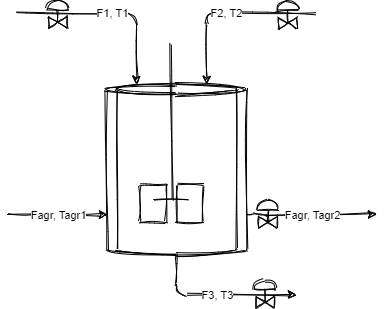

$$h_i = 3$$
$$F_1 = 1$$
$$F_2 = 2$$
$$F_3(t) = 3 - e^{-t}$$  

$$ {dh \over dt} = 10 \cdot {( F_1 + F_2 - F_3(t) )} $$  
$$ T_{sr}(t) = {12 \over h(t)} \cdot \bigg(518.75 - 375 e^{-1.2t} - 68.75 e^{-2.4t} \bigg) $$  
$$ T_{st}(t) = {12 \over h(t)} \cdot 
\bigg( 327.25 \bigg(1 - 0.4e^{-1.2t} \bigg) - 45.25e^{-1.8t} - 68.75 e^{-2.4t} \bigg) $$  

$t$ é o tempo decorrido, em horas.  
$F$ é a vazão volumétrica em $m^3/h$.  
$h$ é a altura em $m$; $h_i$ é a altura quando $t = 0$.  
$T$ é a temperatura em Kelvin.  

Tarefas:

- Plote a curva de nível (altura) do reator.
    - Ela será dada pela atualização de h_i ao longo do tempo, feita por ${dh \over dt}$.  
- Plote as curvas de temperatura de saída do reator e do trocador.
    - Faça isso num gráfico separado da altura, pois a magnitude dos valores é bem distinta.


- Calcule o tempo para que o sistema alcance o regime permanente. 
    - Use a derivada das funções como critério: se, para um dado incremento infinitesimal, as variações do sistema tenderem a zero, então o regime permanente foi atingindo. 
    - **Todas** as condições dele devem convergir para uma constante; no nosso caso, temperaturas e nível. 
    - Use aquilo que você achar razoável para definir o que é ***infinitesimal*** e o que é ***tender a zero***.
    - PS: Um sistema pode ter um "equilíbrio instável", dado pela inversão da inclinação da derivada, que passa por um zero e irá apontar uma "falsa convergência". Você pode facilmente descobrir se uma função possui este "equilíbrio instável" plotando o seu gráfico.
    

- Plote as derivadas das variáveis de saída do sistema.

### Derivadas de 1º Ordem

$$ {df \over dx} = \lim_{j \to 0} {f(x+j) - f(x) \over j} $$

Nós podemos calcular derivadas de maneira numérica pela definição da derivada como um limite. 

Calcular a derivada num ponto particular é uma tarefa trivial e pode ser feita apenas com os conceitos mostrados nas duas primeiras semanas. 

Você pode fazer isso criando uma função que recebe $f$, $x$ e $j$ e devolve a derivada numérica no ponto t, usando a definição da derivida como limite.

Nossa tarefa agora é calcular a derivada para um conjunto de pontos, para podermos plotar o gráfico e analisar a convergência. $dh \over dt$ já está dado; para a derivada das temperaturas, pode ser mais interessante usar a lista de temperaturas produzida para o plot da curva $T(K)$ x $t(h)$:

- para o índice $i$, usamos $i+1$ como $f(x+j)$; 
- $i$ como $f(x)$;
- $j$ como o espaço de tempo entre um e outro, que você já conhece porque os usou para produzir a lista de funções.

In [40]:
import math as m
e = m.e

## Problema 4:

A [câmara de poeira](https://en.wikipedia.org/wiki/Dust_collector)(imagem abaixo) é um dos equipamentos mais simples para a separação de sólidos e gases. É muito comumente empregado na etapa de tratamento de efluentes gasosos na indústria. Embora seja pouco eficiente e ocupe grande espaço, seu baixo custo operacional e baixo investimento ainda o torna uma opção viável em muitos casos. 

Sua eficiência aumenta com o uso de aletas, embora isso pareça implicar numa maior perda de carga no processo. Dependendo do caso, isso pode ou não ser relevante. No caso de uma coleta mais fina, outros métodos mais robustos podem ser empregados, como equipamentos que utilizem um campo centrífugo (ciclones).

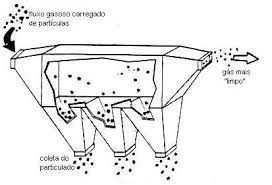

### P2 2010/1 - Operações Unitárias I - Ricardo Pires Peçanha. Adaptado. 

Uma câmara de poeira/sedimentação (largura(B) = 1.5 m, altura (H) = 0.6 m, comprimento (L) = 6.0 m) trata 9000 m³/h de um efluente gasoso industrial contendo partículas sólidas em suspensão ($\rho_s$ = 2.65 g/cm³).  A distribuição de tamanhos das partículas obedece ao modelo RRB com $D_{63.2}$ = 50 $\mu m$ e n = 2,3. Calcule a eficiência global de coleta da câmara de poeira. Suponha que as propriedades físicas do gás em questão são idênticas às do ar a 120° C e 1 atm e que a Lei de Stokes é válida.

Utilizando as pressuposições, vamos às equações:

A eficiência global $\bar \eta$, para uma corrente de partículas que segue a distribuição de partículas RRB, é dada por:

$$ \bar \eta = K \int_{0}^{y_{min}} \Bigg [ln \Bigg ({1 \over 1 - y} \Bigg) \Bigg]^{2/n}dy + (1 - y_{min})$$

$$ K = {D_{63.2}^2 \over D_{min}^2} $$

$$ y_{min} = 1 - e^{-\bigg( {\Large {D_{min} \over D_{63.2}}} \bigg)^{\Large n}} $$

$$ D_{min} = \sqrt{ 18 \mu Q \over (\rho_s - \rho_f)gBL } $$

Onde:

$D_{min}$ é o menor tamanho de partícula que ainda é coletado com eficiência de 100%.
$y_{min}$ é a fração de partículas (em relação ao todo da distribuição) cujo tamanho é menor que $D_{min}$.

*Nota: as partículas, ao se assumir modelo de Stokes válidos, são necessariamente esferas.*

$D_{63.2}$ e $n$ são valores empíricos para o modelo RRB.  
$\mu $ é a viscosidade dinâmica do ar. $\mu = 0.9062kg/m^3 $   
$\rho_f$ é a densidade do ar. $\rho_f = 22.55 \cdot 10^{-6} Pa \cdot s$  
$\rho_s$ é a densidade do material particulado, assumida constante.  
$g$ é a aceleração da gravidade. 


### Integração Numérica

Uma integral pode ser calculada numéricamente pela soma de áreas infinitesimais, pela conhecida [Soma de Riemann](https://pt.wikipedia.org/wiki/Soma_de_Riemann). Existem diferentes métodos para definir como será essa área infinitesimal a ser calculada, mas todas elas convergem para o mesmo valor quanto mais próximo de inifinitesimal for o incremento dado.

$$ \int_{a}^{b} f(t)dt = \sum_{n=1}^{{b-a \over dt} = \infty} f(a+ndt) \cdot dt = \lim_{h \to 0} \sum_{n=1}^{{b-a \over h}} f(a+nh) \cdot h $$

Para uma dada função $f(t)$ cuja integral no intervalo $a \rightarrow b$ seja deseja saber, podemos calcular a área de vários retângulos bem finos, de finura $dt$, para os $n$ intervalos $dt$ que estejam compreendidos entre $a$ e $b$ e somá-los. Note que se $f(t) < 0$, a área será "negativa", cancelando com a área positiva, o que é consistente com a definição de integral que se é utilizada. Além disso, atente que $dt$ é sempre positivo; se isso passar despercebido você irá acabar calculando "áreas negativas" e áreas positivas nos lugares errados.

- Dica: $n = {b - a \over h}$, mas o *loop for* só vai funcionar para um número inteiro, lembre-se de converter $n$ para inteiro, mesmo que no papel a divisão já resultasse num número inteiro, por causa do problema do ponto flutuante, que será visto no Notebook de laços aninhados (semana 6).

In [359]:
import math as m
e = m.e
ln = lambda x: m.log(x, e)